In [1]:
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt

def function(t):
  return 50*(math.exp(-2*t/5) -math.exp(-t/2))
t = np.linspace(0, 10, 101)  

exact=[]                      
for i in t:
    exact.append(function(i))


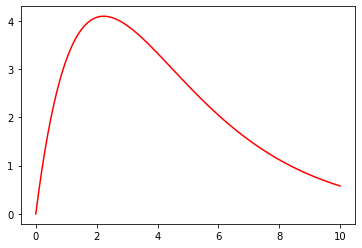

In [2]:
plt.plot(t, exact, 'r', label='exact(t)')

# **Euler method**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, t, b, k):
    return np.array([x[1], -b*x[1] - k*x[0]])

t = np.linspace(0, 10, 101) 
b = 9/10
k = 2/10
y0 = np.array([0,5])

def rungekutta1(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] + (t[i+1] - t[i]) * f(y[i], t[i], *args)
    return y

rk1 = rungekutta1(f, y0, t, args=(b, k))




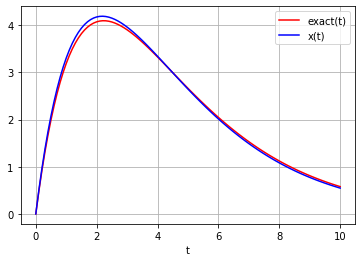

In [4]:
plt.plot(t, exact, 'r', label='exact(t)')
plt.plot(t, rk1[:, 0], 'b', label='x(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

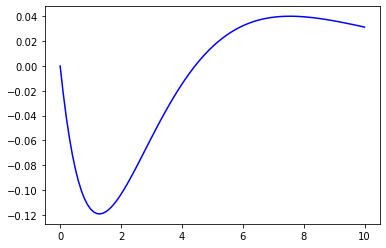

In [5]:
err=[]
for i in range(len(t)):
  err.append(exact[i]-rk1[:,0][i])

plt.plot(t, err, 'b', label='err')



In [6]:
Sum=0
ab=0
for i in range(len(t)):
  Sum=Sum=+ err[i]**2
  ab=ab + abs(err[i])

RMSE=math.sqrt(Sum)/len(t)
MAE=ab/len(t)

print("RMSE = ",RMSE)
print("MAE = ",MAE)


RMSE =  0.0003108424510559823
MAE =  0.048392296467771656


# **odeint() method**

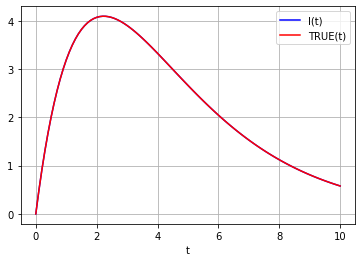

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(x, t, b, k):
    return np.array([x[1], -b*x[1] - k*x[0]])

t = np.linspace(0, 10, 101) 
b = 9/10
k = 2/10
y0 = np.array([0,5])


odeintsol = odeint(f, y0, t, args=(b, k))

plt.plot(t, odeintsol[:, 0], 'b', label='I(t)')
plt.plot(t, exact, 'r', label='TRUE(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


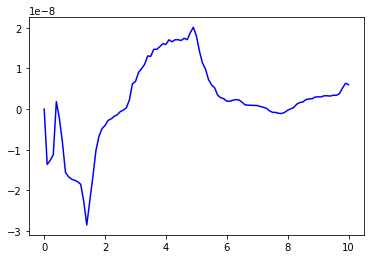

In [59]:
err=[]
for i in range(len(t)):
  err.append(exact[i]-odeintsol[:,0][i])


plt.plot(t, err, 'b', label='Q(t)')


In [8]:
Sum=0
ab=0
for i in range(len(t)):
  Sum=Sum=+ err[i]**2
  ab=ab + abs(err[i])

RMSE=math.sqrt(Sum)/len(t)
MAE=ab/len(t)

print("RMSE = ",RMSE)
print("MAE = ",MAE)

RMSE =  0.0003108424510559823
MAE =  0.048392296467771656
